THE SPARKS FOUNDATION

Task 1: Prediction using Supervised Learning 

Author : Deepu Kumar

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#below are the ML libraries
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
# Reading the data from remote link
data = pd.read_csv('http://bit.ly/w-data')
print("Students Hours and scores:")
data.head(10)

Students Hours and scores:


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Check if there any null value in dataset
data.isnull == True

False

EXPLORATORY DATA ANALYSIS

In [4]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [5]:
data.shape

(25, 2)

In [6]:
data.describe(include = 'all')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.nunique()

Hours     23
Scores    23
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


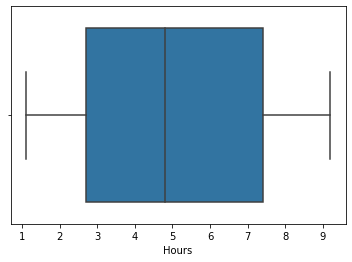

In [10]:
# Box Plots are used for outlier detection
sns.boxplot(data['Hours']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


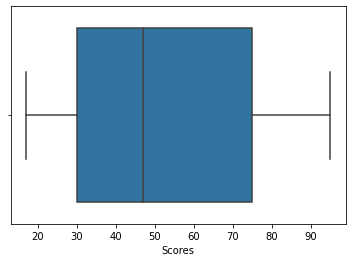

In [11]:
sns.boxplot(data['Scores']);

The Boxplot indicates absence of outliners

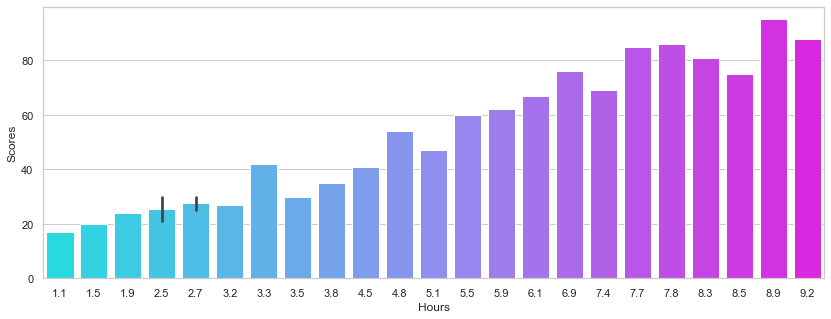

In [12]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1,figsize = (14,5))
ax = sns.barplot(x='Hours', y='Scores', data =data, palette='cool')

The above graph highlights the scored attainted by a student after studying for given no. of hours

DATA VISUALIZATION

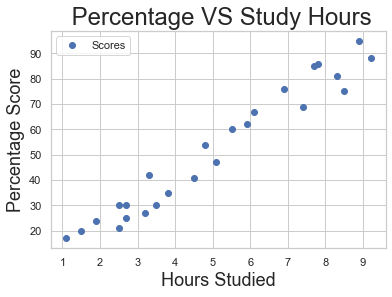

In [13]:
data.plot(x='Hours', y='Scores', style='o')
plt.title(' Percentage VS Study Hours', size=24) #title of the graph
plt.xlabel('Hours Studied', size=18)  #label at x-axis
plt.ylabel('Percentage Score', size=18)  #label at y-axis
plt.show()

The above graph highlights that there exist a positive linear relationship between the number of hours studied and percentage score.

Plotting a Regression Line to confirm the correlation

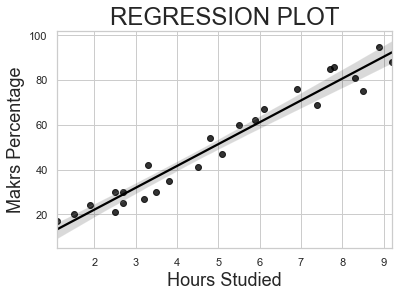

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [14]:
sns.regplot(x=data['Hours'], y=data['Scores'], color='black')
plt.title('REGRESSION PLOT', size=24)
plt.xlabel('Hours Studied', size=18)
plt.ylabel('Makrs Percentage', size=18)
plt.show()
print(data.corr())

It is confirmed that the variables are positively correlated.

Training the model

1. Splitting the data

In [15]:
# defining X & Y from data
X = data.iloc[:, :-1].values
Y = data.iloc[:, 1].values

In [16]:
#Splitting the data into 2
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

2. Train the Algorithm

In [17]:
regression = LinearRegression()
regression.fit(X_train, Y_train)
print("******** Model Trained ********")

******** Model Trained ********


PREDICTING THE PRECENTAGE OF MARKS

In [18]:
pred_y = regression.predict(X_test)
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


COMPARING PREDICTED MARKS WITH ACTUAL MARKS

In [19]:
compare_scores = pd.DataFrame({'Actual Marks': Y_test, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


VISUALIZING THE COMPARISON BETWEEN PREDICTED AND ACTUAL MARKS

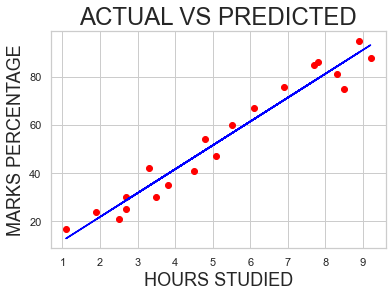

In [20]:
plt.scatter(X_train, Y_train, color='red')
plt.plot(X_train, regression.predict(X_train), color='blue')
plt.title("ACTUAL VS PREDICTED", size=24)
plt.ylabel('MARKS PERCENTAGE', size=18)
plt.xlabel('HOURS STUDIED', size=18)
plt.show()

EVALUATING THE MODEL

In [21]:
print('The training score of the model is: ', regression.score(X_train,Y_train))
print('The testing score of the model is: ', regression.score(X_test,Y_test))

The training score of the model is:  0.9515510725211552
The testing score of the model is:  0.9454906892105356


CALCULATING ACCURACY OF MODEL

In [22]:
print('Mean absolute error: ', mean_absolute_error(Y_test,pred_y))

Mean absolute error:  4.183859899002975


Small value of Mean absolute error indicate that the chances of error or wrong forecasting through the model are very less

WHAT WILL BE THE PREDICTED SCORE OF A STUDENT IF HE/SHE STUDIES FOR 9.25 hrs/day?

In [24]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.692


RESULT:

According to the regression model, if a student studies for 9.25 hours a day, he/she is likely to score 93.629